<a href="https://colab.research.google.com/github/MarcosRoms/Deep_learning_colab/blob/main/EJEMPLO_6_DataAugmentation_y_TransferLearning_DIPLOMADOIA_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EJEMPLO DE GATOS Y PERROS

In [ ]:
#%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.15.0



## Con esta instrucción puedes cargar los Datos


In [ ]:
from google.colab import files
# se debe cargar el fichero “cats_and_dogs_small.zip”
files.upload()

{}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import zipfile

local_zip = '/content/drive/MyDrive/cats_and_dogs_small.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/content')
zip_ref.close()


## Creamos las carpetas de entrenamiento, validación y prueba
### También los subdirectorios

In [ ]:

base_dir = '/content/cats_and_dogs_small'

train_dir =      os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir =       os.path.join(base_dir, 'test')

# Directorio con las imagenes de training
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directorio con las imagenes de validation
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Directorio con las imagenes de test
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')



In [ ]:
print('total de imágenes de Gatos para entrenamiento:', len(os.listdir(train_cats_dir ) ))
print('total de imágenes de Perros para entrenamiento:', len(os.listdir(train_dogs_dir) ))

print('total de imágenes de Gatos para validación:', len(os.listdir(validation_cats_dir) ))
print('total de imágenes de Perros para validación:', len(os.listdir(validation_dogs_dir) ))

print('total de imágenes de Gatos para prueba:', len(os.listdir(test_cats_dir) ))
print('total de imágenes de Perros para prueba:', len(os.listdir(test_dogs_dir) ))


total de imágenes de Gatos para entrenamiento: 1000
total de imágenes de Perros para entrenamiento: 1000
total de imágenes de Gatos para validación: 500
total de imágenes de Perros para validación: 500
total de imágenes de Gatos para prueba: 500
total de imágenes de Perros para prueba: 500


Ejemplo de rotación de 45º a una imagen que usted elija de sus archivos.

Saving perrito1.jpg to perrito1.jpg


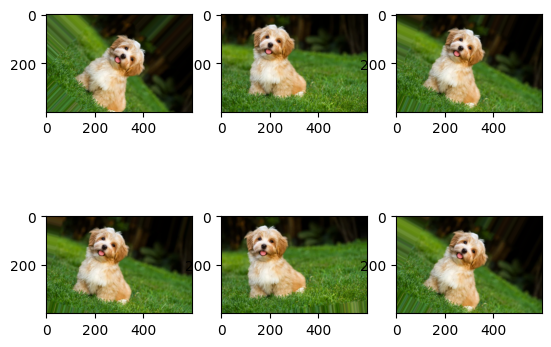

In [ ]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()
for fn in uploaded.keys():
  path='/content/' + fn
  img=image.load_img(path)
  data = img_to_array(img)
  samples = expand_dims(data, 0)

  # exemplo de "rotation_range"
  datagen = ImageDataGenerator(rotation_range=45)

  it = datagen.flow(samples, batch_size=1)
  for i in range(6):
  	pyplot.subplot(230 + 1 + i)
  	batch = it.next()
  	image = batch[0].astype('uint8')
  	pyplot.imshow(image)
pyplot.show()

### ModelDA: Modelo con *Data Augmentation*

## Declaramos la arquitectura

In [ ]:
from tensorflow.keras import Model

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

modelDA = Sequential()
modelDA.add(Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
modelDA.add(MaxPooling2D((2,2)))
modelDA.add(Conv2D(64,(3,3), activation= 'relu'))
modelDA.add(MaxPooling2D((2,2)))
modelDA.add(Conv2D(128,(3,3), activation= 'relu'))
modelDA.add(MaxPooling2D((2,2)))
modelDA.add(Conv2D(128,(3,3), activation= 'relu'))
modelDA.add(MaxPooling2D((2,2)))
modelDA.add(Flatten())
modelDA.add(Dense(512, activation= 'relu'))
modelDA.add(Dense(1, activation= 'sigmoid'))

modelDA.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 128)      

## Hiperparámetros

In [ ]:
from tensorflow.keras.optimizers import RMSprop

modelDA.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['acc'])

modelDA.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 128)      

#Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Generamos nuevas imágenes para el directorio de entrenamiento.
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
# Normalizamos las carpetas de validación y prueba.
validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# Los NUEVOS DIRECTORIOS:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=100,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=100,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Otros hiperparámetros y entrenamiento

In [ ]:
batch_size = 100
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

historyDA = modelDA.fit(
      train_generator,
      steps_per_epoch= steps_per_epoch,
      epochs= 50,
      validation_data= validation_generator,
      validation_steps= validation_steps,
      verbose=2)

Epoch 1/50
20/20 - 22s - loss: 0.6921 - acc: 0.5165 - val_loss: 0.6922 - val_acc: 0.5030 - 22s/epoch - 1s/step
Epoch 2/50
20/20 - 15s - loss: 0.6914 - acc: 0.5235 - val_loss: 0.6909 - val_acc: 0.5550 - 15s/epoch - 746ms/step
Epoch 3/50
20/20 - 16s - loss: 0.6901 - acc: 0.5290 - val_loss: 0.6896 - val_acc: 0.5010 - 16s/epoch - 815ms/step
Epoch 4/50
20/20 - 15s - loss: 0.6885 - acc: 0.5500 - val_loss: 0.6932 - val_acc: 0.4950 - 15s/epoch - 766ms/step
Epoch 5/50
20/20 - 15s - loss: 0.6890 - acc: 0.5250 - val_loss: 0.6847 - val_acc: 0.5890 - 15s/epoch - 750ms/step
Epoch 6/50
20/20 - 16s - loss: 0.6845 - acc: 0.5680 - val_loss: 0.6837 - val_acc: 0.5120 - 16s/epoch - 800ms/step
Epoch 7/50
20/20 - 15s - loss: 0.6851 - acc: 0.5485 - val_loss: 0.6798 - val_acc: 0.5290 - 15s/epoch - 762ms/step
Epoch 8/50
20/20 - 15s - loss: 0.6781 - acc: 0.5695 - val_loss: 0.6717 - val_acc: 0.6020 - 15s/epoch - 740ms/step
Epoch 9/50
20/20 - 15s - loss: 0.6776 - acc: 0.5520 - val_loss: 0.6763 - val_acc: 0.5440 - 

In [ ]:
print (steps_per_epoch)
print (validation_steps)
test_lost, test_acc= modelDA.evaluate(test_generator)
print ("Test Accuracy:", test_acc)

20
10
10/10 [==============================] - 1s 143ms/step - loss: 0.5939 - acc: 0.7010
Test Accuracy: 0.7009999752044678


<Figure size 640x480 with 0 Axes>

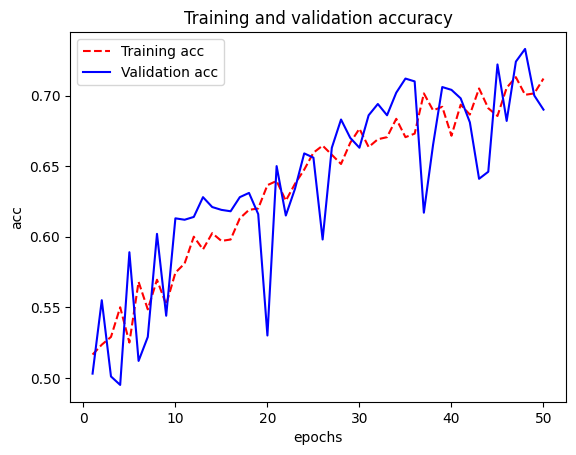

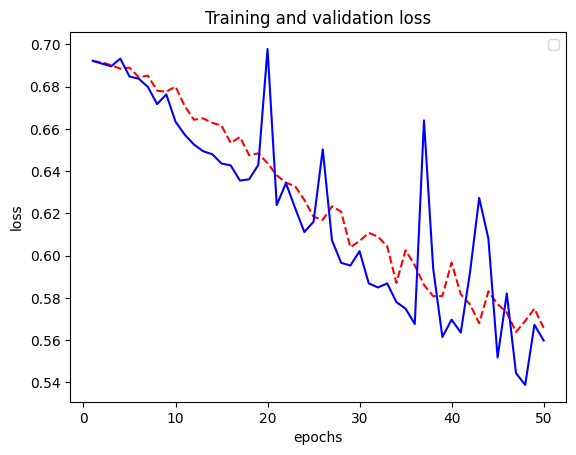

<Figure size 640x480 with 0 Axes>

In [ ]:

import matplotlib.pyplot as plt


acc      = historyDA.history[     'acc' ]
val_acc  = historyDA.history[ 'val_acc' ]
loss     = historyDA.history[    'loss' ]
val_loss = historyDA.history['val_loss' ]

epochs    = range(1,len(acc)+1,1) # obtener número de epochs

plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and validation accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()


plt.plot  ( epochs,     loss, 'r--' )
plt.plot  ( epochs, val_loss ,  'b' )
plt.title ('Training and validation loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()
plt.figure()



# Aprendizaje por transferencia

### ModelFE: Modelo con *Feature Extraction*

In [ ]:

from tensorflow.keras.applications import VGG16

pre_trained_model = VGG16(input_shape = (150, 150, 3),
                                include_top = False,
                                weights = 'imagenet')


#pre_trained_model.summary()

for layer in pre_trained_model.layers:
  layer.trainable = False


pre_trained_model.summary()




58889256/58889256 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

## Modificando y declarando la parte del clasificador

In [ ]:
from tensorflow.keras import Model

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

modelFE = Sequential()
modelFE.add(pre_trained_model)
modelFE.add(Flatten())
modelFE.add(Dense(256, activation= 'relu'))
modelFE.add(Dense(1, activation= 'sigmoid'))

modelFE.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Normalizamos las carpetas de validación y prueba.
validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# Los NUEVOS DIRECTORIOS:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=100,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=100,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Hiperparámetros y entrenamiento

In [ ]:
from tensorflow.keras.optimizers import RMSprop

modelFE.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['acc'])

batch_size = 100
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

historyFE = modelFE.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = steps_per_epoch,
            epochs = 100,
            validation_steps = validation_steps,
            verbose = 2)



Epoch 1/100
20/20 - 25s - loss: 0.6335 - acc: 0.6525 - val_loss: 0.4444 - val_acc: 0.7950 - 25s/epoch - 1s/step
Epoch 2/100
20/20 - 17s - loss: 0.4973 - acc: 0.7585 - val_loss: 0.3606 - val_acc: 0.8680 - 17s/epoch - 827ms/step
Epoch 3/100
20/20 - 16s - loss: 0.4401 - acc: 0.7925 - val_loss: 0.3201 - val_acc: 0.8760 - 16s/epoch - 816ms/step
Epoch 4/100
20/20 - 17s - loss: 0.4133 - acc: 0.8070 - val_loss: 0.3052 - val_acc: 0.8820 - 17s/epoch - 841ms/step
Epoch 5/100
20/20 - 17s - loss: 0.4087 - acc: 0.8115 - val_loss: 0.2919 - val_acc: 0.8850 - 17s/epoch - 827ms/step
Epoch 6/100
20/20 - 16s - loss: 0.3554 - acc: 0.8510 - val_loss: 0.2964 - val_acc: 0.8750 - 16s/epoch - 811ms/step
Epoch 7/100
20/20 - 17s - loss: 0.3827 - acc: 0.8300 - val_loss: 0.3024 - val_acc: 0.8700 - 17s/epoch - 839ms/step
Epoch 8/100
20/20 - 17s - loss: 0.3628 - acc: 0.8295 - val_loss: 0.2791 - val_acc: 0.8870 - 17s/epoch - 831ms/step
Epoch 9/100
20/20 - 16s - loss: 0.3558 - acc: 0.8355 - val_loss: 0.2701 - val_acc: 

In [ ]:
test_lost, test_acc= modelFE.evaluate(test_generator)
print ("Test Accuracy:", test_acc)

10/10 [==============================] - 2s 199ms/step - loss: 0.3047 - acc: 0.8590
Test Accuracy: 0.859000027179718


<Figure size 640x480 with 0 Axes>

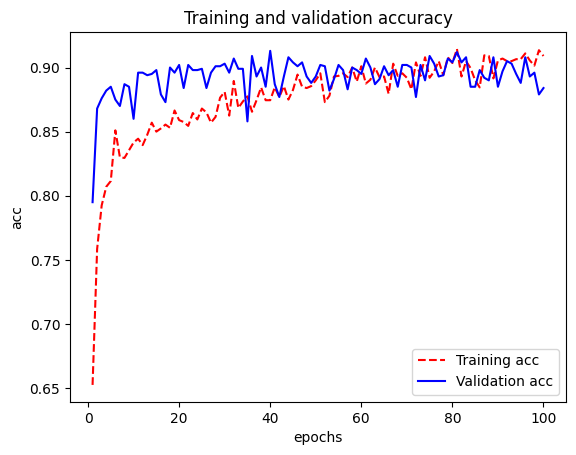

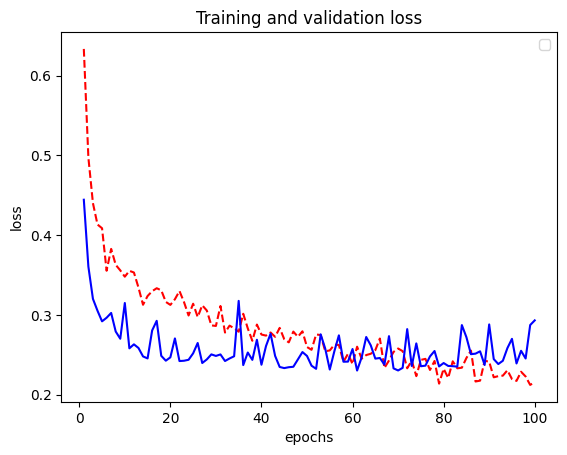

<Figure size 640x480 with 0 Axes>

In [ ]:

import matplotlib.pyplot as plt


acc      = historyFE.history[     'acc' ]
val_acc  = historyFE.history[ 'val_acc' ]
loss     = historyFE.history[    'loss' ]
val_loss = historyFE.history['val_loss' ]

epochs    = range(1,len(acc)+1,1) # obtener número de epochs

plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and validation accuracy')
plt.ylabel('acc')
#plt.ylim(0,1)
plt.xlabel('epochs')

plt.legend()
plt.figure()


plt.plot  ( epochs,     loss, 'r--' )
plt.plot  ( epochs, val_loss ,  'b' )
plt.title ('Training and validation loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')
#plt.ylim(0,1)

plt.legend()
plt.figure()




### ModelFT : Modelo con *Fine Tuning*

In [ ]:
from tensorflow.keras.applications import VGG16

pre_trained_model = VGG16(input_shape = (150, 150, 3),
                                include_top = False,
                                weights = 'imagenet')

pre_trained_model.trainable = True

set_trainable = False


for layer in pre_trained_model.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False
pre_trained_model.summary()




Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

## Declare la última sección de la arquitectura (clasificador)

In [ ]:
modelFT = Sequential()

modelFT.add(pre_trained_model)
modelFT.add(Flatten())
modelFT.add(Dense(256, activation= 'relu'))
modelFT.add(Dense(1, activation= 'sigmoid'))



modelFT.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 9177089 (35.01 MB)
Non-trainable params: 7635264 (29.13 MB)
_________________________________________________________________


## Hiperparámetros

In [ ]:
from tensorflow.keras.optimizers import RMSprop

modelFT.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=100,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=100,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Más hiperparámetros y entrenamiento

In [ ]:
batch_size = 100
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

historyFT = modelFT.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = steps_per_epoch,
            epochs = 100,
            validation_steps = validation_steps,
            verbose = 2)


Epoch 1/100
20/20 - 19s - loss: 0.8695 - acc: 0.6760 - val_loss: 0.5100 - val_acc: 0.7200 - 19s/epoch - 966ms/step
Epoch 2/100
20/20 - 16s - loss: 0.4761 - acc: 0.7745 - val_loss: 0.3624 - val_acc: 0.8200 - 16s/epoch - 819ms/step
Epoch 3/100
20/20 - 19s - loss: 0.4142 - acc: 0.8120 - val_loss: 0.2785 - val_acc: 0.8710 - 19s/epoch - 960ms/step
Epoch 4/100
20/20 - 18s - loss: 0.3552 - acc: 0.8545 - val_loss: 0.2700 - val_acc: 0.8840 - 18s/epoch - 888ms/step
Epoch 5/100
20/20 - 17s - loss: 0.3194 - acc: 0.8560 - val_loss: 0.2377 - val_acc: 0.9050 - 17s/epoch - 846ms/step
Epoch 6/100
20/20 - 17s - loss: 0.2938 - acc: 0.8750 - val_loss: 0.2358 - val_acc: 0.8920 - 17s/epoch - 855ms/step
Epoch 7/100
20/20 - 17s - loss: 0.2694 - acc: 0.8890 - val_loss: 0.2093 - val_acc: 0.9170 - 17s/epoch - 834ms/step
Epoch 8/100
20/20 - 17s - loss: 0.2300 - acc: 0.9065 - val_loss: 0.2241 - val_acc: 0.9030 - 17s/epoch - 849ms/step
Epoch 9/100
20/20 - 17s - loss: 0.2326 - acc: 0.9000 - val_loss: 0.1747 - val_ac

<Figure size 640x480 with 0 Axes>

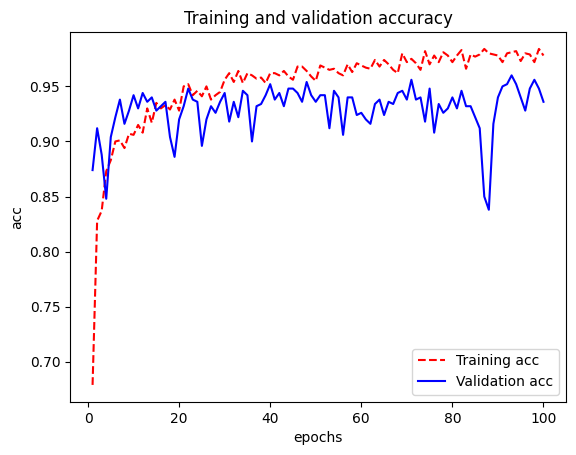

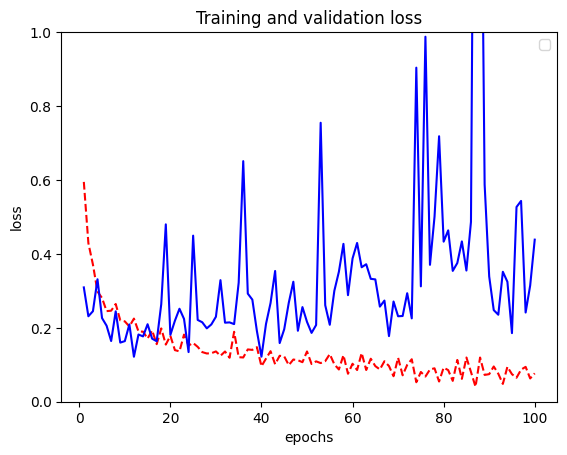

<Figure size 640x480 with 0 Axes>

In [ ]:


import matplotlib.pyplot as plt

acc      = historyFT.history[     'acc' ]
val_acc  = historyFT.history[ 'val_acc' ]
loss     = historyFT.history[    'loss' ]
val_loss = historyFT.history['val_loss' ]

epochs    = range(1,len(acc)+1,1) # obtener número de epochs

plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and validation accuracy')
plt.ylabel('acc')
#plt.ylim(0,1)
plt.xlabel('epochs')

plt.legend()
plt.figure()


plt.plot  ( epochs,     loss, 'r--' )
plt.plot  ( epochs, val_loss ,  'b' )
plt.title ('Training and validation loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')
plt.ylim(0,1)

plt.legend()
plt.figure()



In [ ]:
test_lost, test_acc= modelFT.evaluate(test_generator)
print ("Test Accuracy:", test_acc)

50/50 [==============================] - 3s 55ms/step - loss: 0.3690 - acc: 0.9430
Test Accuracy: 0.9430000185966492


# COMPARAR LOS TRES MÉTODOS

<Figure size 640x480 with 0 Axes>

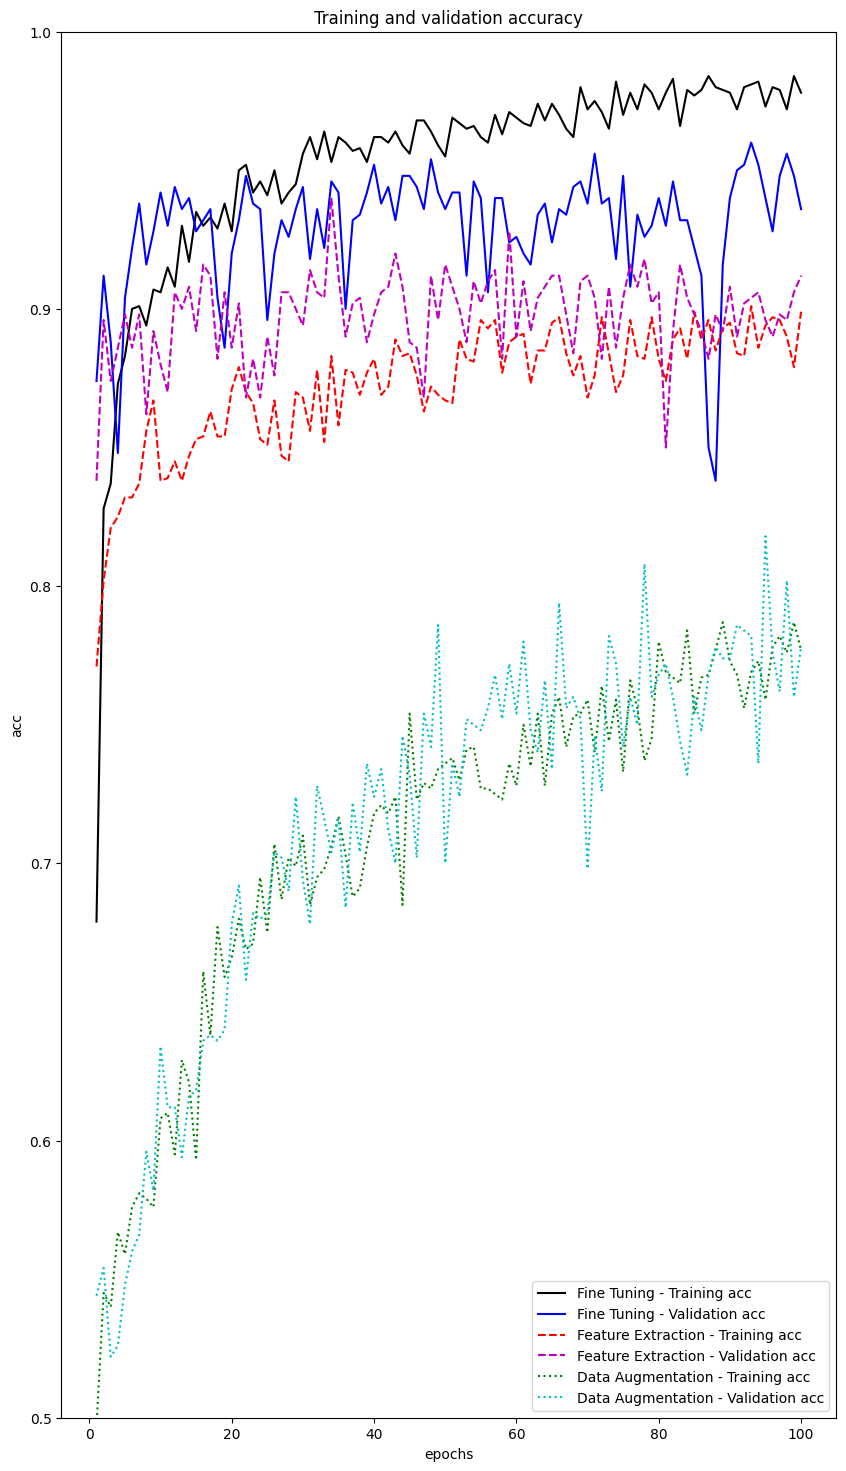

<Figure size 640x480 with 0 Axes>

In [ ]:

accDA      = historyDA.history[     'acc' ]
val_accDA  = historyDA.history[ 'val_acc' ]

accFE      = historyFE.history[     'acc' ]
val_accFE  = historyFE.history[ 'val_acc' ]

accFT      = historyFT.history[     'acc' ]
val_accFT  = historyFT.history[ 'val_acc' ]

epochs    = range(1,len(accDA)+1,1)

plt.figure(figsize=(10,18))

plt.plot  ( epochs,     accFT, 'k', label='Fine Tuning - Training acc '  )
plt.plot  ( epochs, val_accFT,  'b', label='Fine Tuning - Validation acc ')

plt.plot  ( epochs,     accFE, 'r--', label='Feature Extraction - Training acc'  )
plt.plot  ( epochs, val_accFE,  'm--', label='Feature Extraction - Validation acc')

plt.plot  ( epochs,     accDA, 'g:', label='Data Augmentation - Training acc'  )
plt.plot  ( epochs, val_accDA,  'c:', label='Data Augmentation - Validation acc')

plt.title ('Training and validation accuracy')
plt.ylabel('acc')
plt.ylim(0.5,1)
plt.xlabel('epochs')


plt.legend()
plt.figure()





# REALIZAR PRUEBAS

Saving GATO.jpg to GATO (4).jpg
1/1 [==============================] - 1s 731ms/step
[[0.]]


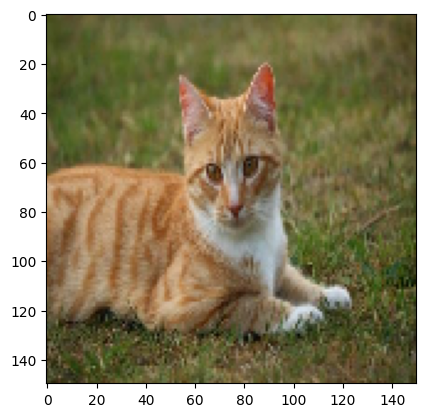

GATO (2).jpg IS A CAT


In [ ]:
import numpy as np

from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded=files.upload()
file=list(uploaded.keys())[0]

path='/content/' + file
img=image.load_img(path, target_size=(150, 150))

x=image.img_to_array(img)
image=np.expand_dims(x, axis=0)

classes = modelFT.predict(image)
print(classes)

plt.imshow(img)
plt.show()

if classes>0: print( fn + " IS A DOG")
else: print( fn + " IS A CAT")
